# Imports and Boilerplate

In [119]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [121]:
from jump_detection.processor import TimeSeriesProcessor
from jump_detection.utils import normalize_features, get_eps, get_class_labels, calculate_median_jump, normalize_jump
from jump_detection.rolling_Ftest import *

# Initialization


In [122]:
# Define a window size for the moving Fstat
window_size = 100
gap_size = 10


# Step 1: Identify all jumps

In [254]:
processor = TimeSeriesProcessor(window_size, gap_size)
processor.load_data("13_4_decay_exp_data.csv")
processor.data = processor.data[0:2000000,1:]

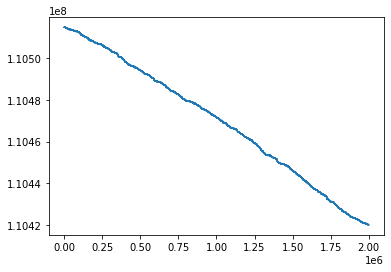

In [255]:
plt.plot(processor.data[:,1])
plt.show()

In [256]:
processor.data.shape

(2000000, 2)

In [257]:
segments = processor.process_data()


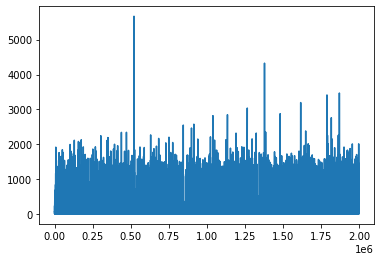

In [258]:
plt.plot(processor.moving_fstats)
# plt.yscale('log')
# plt.ylim((0,10))

In [259]:
print(r"A total of %s jumps were found: "%len(segments))


A total of 2142 jumps were found: 


# Step 2: Reduce to single-event jumps

## Operating on individual segments

In [260]:
segment = segments[6]

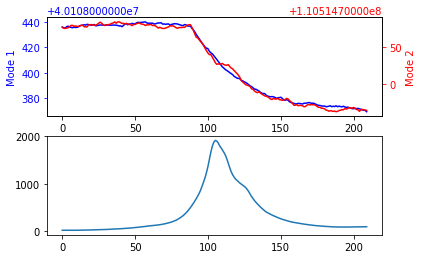

In [261]:
fig, (ax1, ax3) = plt.subplots(2,1)

column1 = segment.original[:, 0]
column2 = segment.original[:, 1]

# Plot the first column on the left y-axis
ax1.plot(column1, 'b-', label='Column 1')
ax1.set_xlabel('Index')
ax1.set_ylabel('Mode 1', color='b')
ax1.tick_params('y', colors='b')

# Create a twin axes object and plot the second column on the right y-axis
ax2 = ax1.twinx()
ax2.plot(column2, 'r-', label='Column 2')
ax2.set_ylabel('Mode 2', color='r')
ax2.tick_params('y', colors='r')


ax3.plot(segment.Fstats)
plt.show()

In [262]:
segment.calculate_features()
segment.features

(27,
 357.3659820442507,
 229845.21559457746,
 1.803228281377228,
 2.273017354019096)

In [263]:
segment.calculate_freq_shift(window_size)

## Getting all features

In [264]:
jump_features = []

# Now segments contains a list of Segment objects.
for i, segment in enumerate(segments):
    segment.calculate_features()
    jump_features.append(segment.features)
jump_features = np.array(jump_features)

In [265]:
jump_features = normalize_features(jump_features)

## Plotting Feature Space and Eps Determination

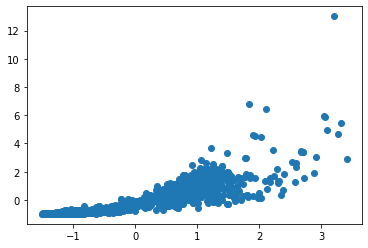

In [266]:
plt.scatter(jump_features[:,1],jump_features[:,2])

In [267]:
eps = get_eps(jump_features)
labels = get_class_labels(jump_features, eps/3)

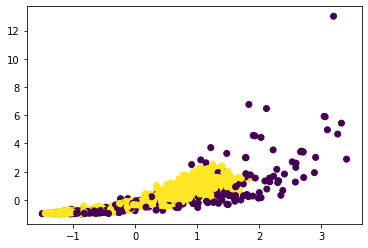

In [268]:
plt.scatter(jump_features[:,1],jump_features[:,2], c = labels)

# Step 3

In [272]:
diffs = []
for segment in segments:
    segment.calculate_freq_shift(window_size)
    diffs.append(segment.diff)
diffs = np.array(diffs)

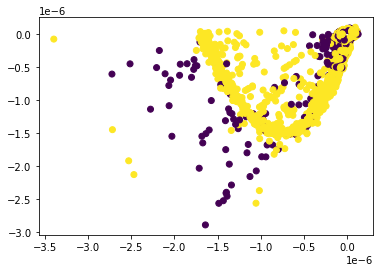

In [273]:
plt.scatter(diffs[:,0],diffs[:,1], c = labels)

In [274]:
median_jump = calculate_median_jump(segments)

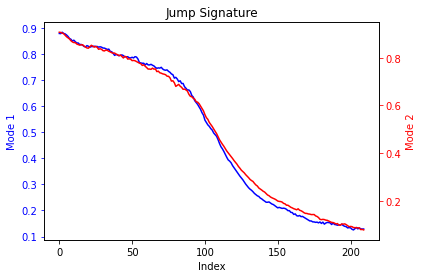

In [277]:
fig, ax1 = plt.subplots(1,1)

column1 = median_jump[:, 0]
column2 = median_jump[:, 1]

ax1.set_title("Jump Signature")
# Plot the first column on the left y-axis
ax1.plot(column1, 'b-', label='Column 1')
ax1.set_xlabel('Index')
ax1.set_ylabel('Mode 1', color='b')
ax1.tick_params('y', colors='b')

# Create a twin axes object and plot the second column on the right y-axis
ax2 = ax1.twinx()
ax2.plot(column2, 'r-', label='Column 2')
ax2.set_ylabel('Mode 2', color='r')
ax2.tick_params('y', colors='r')

plt.show()